<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn2%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data = pd.read_csv('drive/MyDrive/data.csv')
print(data.head())

         TIME     RON
0  2021-01-01  4.9493
1  2021-01-02  4.9493
2  2021-01-03  4.9493
3  2021-01-04  4.8713
4  2021-01-05  4.8721


In [4]:
data.index = pd.to_datetime(data['TIME'], format='%Y-%m-%d')

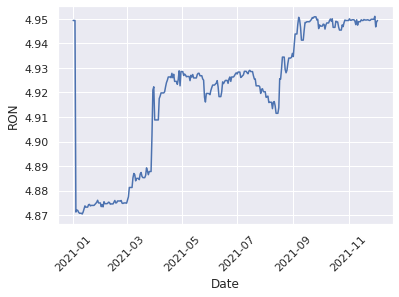

In [5]:
sns.set()
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data.index, data['RON'], )

In [6]:
train = data[data.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
print(train)

                  TIME     RON
TIME                          
2021-01-01  2021-01-01  4.9493
2021-01-02  2021-01-02  4.9493
2021-01-03  2021-01-03  4.9493
2021-01-04  2021-01-04  4.8713
2021-01-05  2021-01-05  4.8721
...                ...     ...
2021-09-26  2021-09-26  4.9508
2021-09-27  2021-09-27  4.9495
2021-09-28  2021-09-28  4.9498
2021-09-29  2021-09-29  4.9460
2021-09-30  2021-09-30  4.9475

[273 rows x 2 columns]


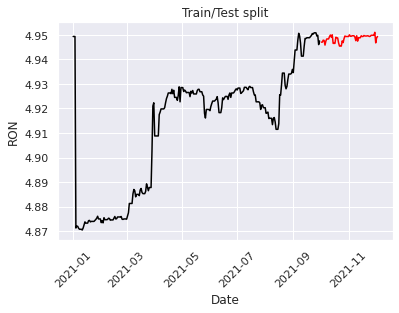

In [7]:
train = data[data.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2021-10-01 00:00:00   2021-12-02 00:00:00
TIME
2021-10-02    4.947654
2021-10-03    4.947521
2021-10-04    4.947629
2021-10-05    4.947535
2021-10-06    4.947609
                ...   
2021-11-29    4.947464
2021-11-30    4.947462
2021-12-01    4.947460
2021-12-02    4.947458
2021-12-03    4.947456
Name: Predictions, Length: 63, dtype: float64
MSE:  0.001713416395447337


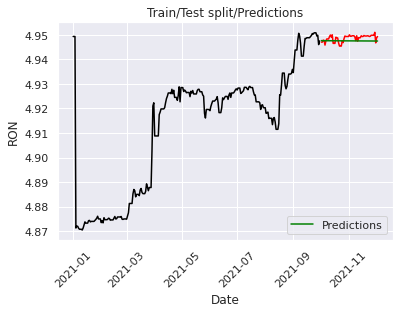

In [8]:
#1
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['RON']
#print(y)
ARMAmodel = SARIMAX(y, order = (2, 1, 2))
ARMAmodel = ARMAmodel.fit(disp=False)

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
#print(y_pred_df)

start = y_pred_df.index[0]
end = y_pred_df.index[-1]

print(start,' ', end)

y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

print(y_pred_out)

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split/Predictions")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["RON"].values, y_pred_df["Predictions"]))
print("MSE: ",arma_rmse)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  0.004737733387625022


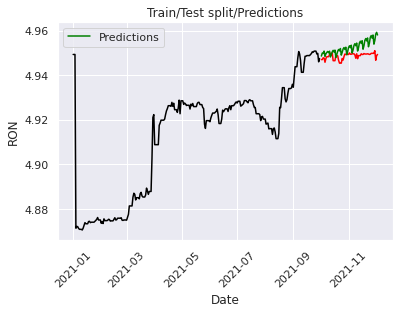

In [9]:
#2
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['RON']
#print(y)
SARIMAXmodel = SARIMAX(y, order = (2, 1, 2), seasonal_order=(2,2,2,6))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
#print(y_pred)
y_pred_df = y_pred.conf_int(alpha = 0.6) 
#print(y_pred_df)

y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split/Predictions")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["RON"].values, y_pred_df["Predictions"]))
print("MSE: ",arma_rmse)

In [33]:
data = pd.read_csv('drive/MyDrive/data.csv')
print(len(data))
#1-300
train = data.iloc[:300]
#301-337
test = data.iloc[300:]

337


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


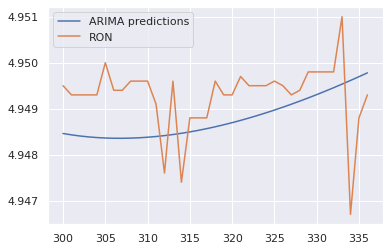

In [35]:
from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(train['RON'],order=(1,0,5))
model=ARIMA(train['RON'],order=(1,1,2))
model=model.fit()
model.summary()

#pred=model.predict(start='2021-10-27',end='2021-12-03',typ='levels').rename('ARIMA predictions')
pred=model.predict(start=len(train),end=len(train)+len(test)-1,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True)
test['RON'].plot(legend=True)

In [12]:
test['RON'].mean()

4.949286486486487

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['RON']))
print(rmse)

0.0009698185464521372


In [23]:
from statsmodels.tsa.arima_model import ARIMA
model2=ARIMA(data['RON'],order=(1,0,5))
model2=model2.fit()
data.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,TIME,RON
TIME,,
2021-11-29,2021-11-29,4.9498
2021-11-30,2021-11-30,4.9510
2021-12-01,2021-12-01,4.9467
2021-12-02,2021-12-02,4.9488
2021-12-03,2021-12-03,4.9493


In [ ]:
index_future_dates=pd.date_range(start='2021-12-04',end='2022-01-03')
pred=model2.predict(start='2021-12-04',end='2022-01-03').rename('ARIMA Predictions')
#pred=model2.predict(start=len(data),end=len(data)+30).rename('ARIMA predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

In [24]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from sklearn.metrics import MeanSquaredError

In [44]:
data = pd.read_csv('drive/MyDrive/data.csv', header=0, parse_dates=[0], index_col=0)
print(data.head())

               RON
TIME              
2021-01-01  4.9493
2021-01-02  4.9493
2021-01-03  4.9493
2021-01-04  4.8713
2021-01-05  4.8721


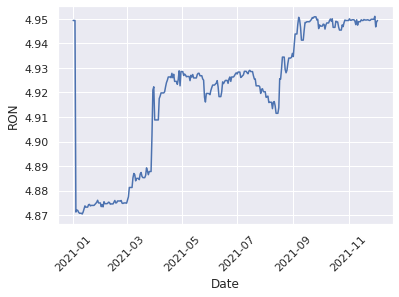

In [45]:
sns.set()
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data.index, data['RON'], )

In [46]:
data.describe()

,RON
count,337.000000
mean,4.919199
std,0.026602
min,4.870500
25%,4.902500
50%,4.925500
75%,4.945800
max,4.951000


In [50]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [94]:
#ExchangeRates = [[4.9493],[4.9493],[4.9493],[4.8713],[4.8721],[4.8720],[4.8712],[4.8708]]
import numpy as np
data = data[0:len(data)]
adata = [x for x in data]
#predict next value
predicted = StartARIMAForecasting(adata, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))

Predicted=4.949317


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [68]:
from pandas import pandas as pa
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

In [74]:
data = pd.read_csv('drive/MyDrive/data.csv', header=0, parse_dates=[0], index_col=0).values

In [75]:
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [95]:
NumberOfElements = len(data)
#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = data[0:TrainingSize]
TestData = data[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()
print(len(TestData))

102


In [118]:
for timepoint in range(len(TestData)):
  ActualValue =  TestData[timepoint]
	#forcast value
  Prediction = StartARIMAForecasting(Actual, 3,1,0)    
  print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
  Predictions.append(Prediction)
  Actual.append(ActualValue)

Actual=4.928000, Predicted=4.929174
Actual=4.929000, Predicted=4.927999
Actual=4.931800, Predicted=4.929180
Actual=4.934000, Predicted=4.931865
Actual=4.934000, Predicted=4.933899
Actual=4.934000, Predicted=4.933756
Actual=4.934300, Predicted=4.933842
Actual=4.935900, Predicted=4.934260
Actual=4.934600, Predicted=4.935901
Actual=4.939300, Predicted=4.934457
Actual=4.943800, Predicted=4.939370
Actual=4.943800, Predicted=4.943882
Actual=4.943800, Predicted=4.943471
Actual=4.947800, Predicted=4.943596
Actual=4.950600, Predicted=4.947939
Actual=4.949500, Predicted=4.950614
Actual=4.946600, Predicted=4.949272
Actual=4.941300, Predicted=4.946421
Actual=4.941300, Predicted=4.941211
Actual=4.941300, Predicted=4.941551
Actual=4.945300, Predicted=4.941523
Actual=4.948500, Predicted=4.945447
Actual=4.948500, Predicted=4.948536
Actual=4.948800, Predicted=4.948199
Actual=4.948800, Predicted=4.948643
Actual=4.948800, Predicted=4.948808
Actual=4.948800, Predicted=4.948798
Actual=4.949300, Predicted=4

In [119]:
from sklearn.metrics import mean_squared_error

Test Mean Squared Error (smaller the better fit): 0.000


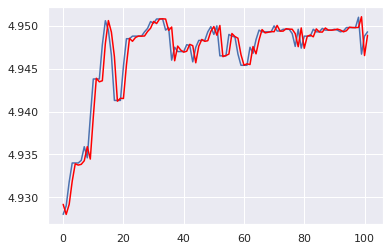

In [120]:
#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()